In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
veh = pd.read_csv("../data/montgomery_incidents_data.csv")

In [158]:
veh['Crash Date/Time'].max()

'12/31/2023 12:19:00 AM'

In [108]:
weather = pd.read_csv("../data/dwh/WeatherFact.csv")
vehicle_crashes = pd.read_csv("../data/dwh/VehicleCrashFact2023.csv", index_col=0)
vehicles = pd.read_csv("../data/dwh/VehicleDim.csv")

C:\Users\tymoteusz.urban\AppData\Local\Temp\ipykernel_50560\1005178928.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_crashes = pd.read_csv("../data/dwh/VehicleCrashFact2023.csv", index_col=0)


In [142]:
vehicles

,Make,Year,BaseModel,VehicleKey,BodyClass,Cylinders,Displacement,Transmission,Drivetrain,FuelType,CityMPG,HighwayMPG
0,AM General,0,Unknown,7588476098035375,NaN,0.0,0.0,NaN,NaN,NaN,0,0
1,AM General,1984,DJ Po Vehicle,850219001214324,Special Purpose Vehicle 2WD,4.0,2.5,Automatic 3,2WD,Regular Gasoline,18,17
2,AM General,1984,FJ8c Post Office,3248986985309296,Special Purpose Vehicle 2WD,6.0,4.2,Automatic 3,2WD,Regular Gasoline,13,13
3,AM General,1985,Post Office DJ5,8968678517256313,Special Purpose Vehicle 2WD,4.0,2.5,Automatic 3,RWD,Regular Gasoline,16,17
4,AM General,1985,Post Office DJ8,3872758082313622,Special Purpose Vehicle 2WD,6.0,4.2,Automatic 3,RWD,Regular Gasoline,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
11632,smart,2015,fortwo,7884345398630669,Two Seaters,0.0,0.0,Automatic 1,RWD,Electricity,34,38
11633,smart,2016,fortwo,7884345348297812,Two Seaters,0.0,0.0,Automatic 1,RWD,Electricity,122,39
11634,smart,2017,fortwo,7884345365075431,Two Seaters,3.0,0.9,Automatic 1,RWD,Premium Gasoline,31,38
11635,smart,2018,fortwo,7884345180521622,Two Seaters,0.0,0.0,Automatic 1,RWD,Electricity,112,91


In [111]:
crashes_make = vehicle_crashes.merge(vehicles, on='VehicleKey')

In [114]:
crashes_make['HitRun'].value_counts()

HitRun
False    15155
True      3761
Name: count, dtype: int64

In [123]:
car_counts = crashes_make.groupby('Make').agg(count = pd.NamedAgg('ReportNumber', 'count')).reset_index()

In [124]:
hit_run_counts = crashes_make[crashes_make['HitRun']].groupby('Make').size().reset_index(name='hit_run_count')

In [125]:
merged_counts = pd.merge(car_counts, hit_run_counts, on='Make', how='left')
merged_counts['hit_run_count'] = merged_counts['hit_run_count'].fillna(0)

merged_counts['hit_run_percentage'] = (merged_counts['hit_run_count'] / merged_counts['count']) * 100

In [139]:
merged_counts.sort_values(by='hit_run_percentage', ascending=False).tail(50)

,Make,count,hit_run_count,hit_run_percentage
73,Volkswagen,386,70.0,18.134715
48,Nissan,1152,205.0,17.795139
61,Scion,23,4.0,17.391304
42,Mercedes-Benz,412,71.0,17.233010
22,Honda,2869,493.0,17.183688
18,Gillig,227,39.0,17.180617
35,Lexus,414,71.0,17.149758
56,Pontiac,24,4.0,16.666667
12,Ford,1714,277.0,16.161027
38,MINI,45,7.0,15.555556


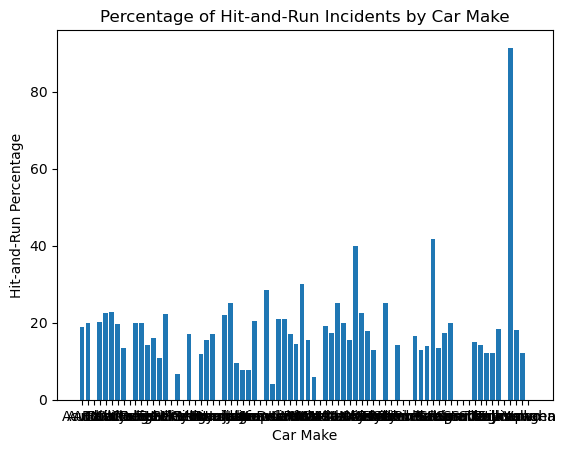

In [128]:
plt.bar(merged_counts['Make'], merged_counts['hit_run_percentage'])
plt.xlabel('Car Make')
plt.ylabel('Hit-and-Run Percentage')
plt.title('Percentage of Hit-and-Run Incidents by Car Make')
plt.show()

## sposób 1

In [ ]:
# tworzymy klasy deszczu
weather['RainClass'] = weather['Rain'].apply(lambda x: round(x*2) / 2)
# liczymi liczbę występowania danej klasy deszczu
rain_counts = weather['RainClass'].value_counts()
# dodajemy do tabelki
weather['RainClassCount'] = weather['RainClass'].map(rain_counts)
# # łączymy wypadki z pogodą
crash_weather = crashes.merge(weather, on=['LocationAreaKey', 'DateHourKey'])
# grupujemy po klasie deszczu, patrzymy ile jest wypadków 
# dla rain count bierzemy max ale może być też min, moda cokolwiek bo wszędzie jest tak samo
crashes_by_rain = crash_weather.groupby('RainClass').agg(
    crashcount = pd.NamedAgg(column="ReportNumber", aggfunc="count"),
    raincount = pd.NamedAgg(column='RainClassCount', aggfunc="max")
).reset_index()
# normalizujemy liczbe wypadków
crashes_by_rain['CrashCountNorm'] = crashes_by_rain['crashcount'] / crashes_by_rain['raincount']
# wykres
plt.bar(crashes_by_rain['RainClass'], crashes_by_rain['CrashCountNorm'])
plt.title('średnia liczba pojazdów biorących udział w wypadku na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

In [84]:
# tworzymy klasy deszczu
weather['RainClass'] = weather['Rain'].apply(lambda x: round(x*2) / 2)

In [85]:
# liczymi liczbę występowania danej klasy deszczu
rain_counts = weather['RainClass'].value_counts()

In [86]:
# dodajemy do tabelki
weather['RainClassCount'] = weather['RainClass'].map(rain_counts)

In [87]:
# to jeśi chcemy wypadki, bez tego jeśli chcemy badać liczbę samochodów
# crashes = vehicle_crashes[['ReportNumber', 'LocationAreaKey', 'DateHourKey']].groupby('ReportNumber').agg('max').reset_index()
crashes = vehicle_crashes

In [88]:
# łączymy wypadki z pogodą
crash_weather = crashes.merge(weather, on=['LocationAreaKey', 'DateHourKey'])

In [89]:
# grupujemy po klasie deszczu, patrzymy ile jest wypadków 
# dla rain count bierzemy max ale może być też min, moda cokolwiek bo wszędzie jest tak samo
crashes_by_rain = crash_weather.groupby('RainClass').agg(
    crashcount = pd.NamedAgg(column="ReportNumber", aggfunc="count"),
    raincount = pd.NamedAgg(column='RainClassCount', aggfunc="max")
).reset_index()

In [90]:
crashes_by_rain['CrashCountNorm'] = crashes_by_rain['crashcount'] / crashes_by_rain['raincount']

Text(0, 0.5, 'deszcz w jakiejs tam jednostce')

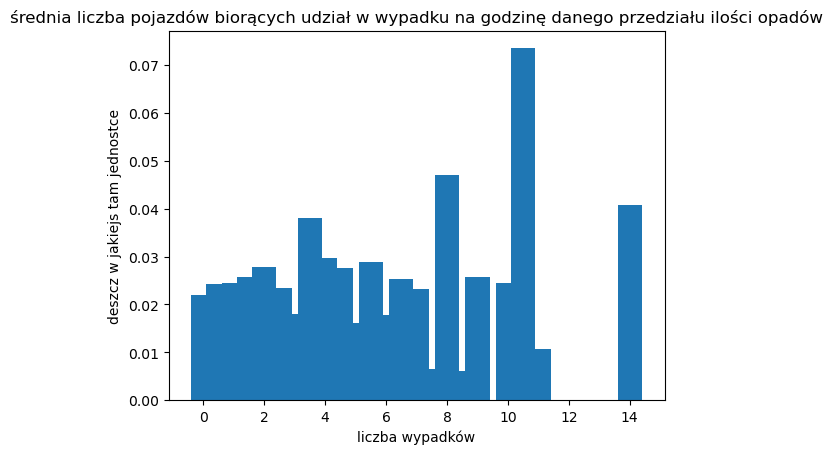

In [92]:
# dla pojazdów
plt.bar(crashes_by_rain['RainClass'], crashes_by_rain['CrashCountNorm'])
plt.title('średnia liczba pojazdów biorących udział w wypadku na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

Text(0, 0.5, 'deszcz w jakiejs tam jednostce')

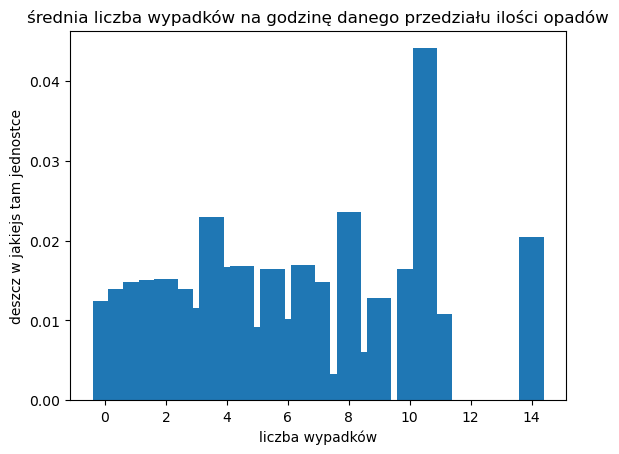

In [83]:
# dla wypadków
plt.bar(crashes_by_rain['RainClass'], crashes_by_rain['CrashCountNorm'])
plt.title('średnia liczba wypadków na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

## sposób 2

In [93]:
# tworzymy klasy deszczu
weather['RainClass'] = weather['Rain'].apply(lambda x: round(x*2) / 2)

In [94]:
# liczymi liczbę występowania danej klasy deszczu
rain_counts = weather['RainClass'].value_counts()

In [96]:
# to jeśi chcemy wypadki, bez tego jeśli chcemy badać liczbę samochodów
crashes = vehicle_crashes[['ReportNumber', 'LocationAreaKey', 'DateHourKey']].groupby('ReportNumber').agg('max').reset_index()

In [97]:
# łączymy wypadki z pogodą
crash_weather = crashes.merge(weather, on=['LocationAreaKey', 'DateHourKey'])

In [98]:
# grupujemy po klasie deszczu, patrzymy ile jest wypadków 
crashes_by_rain = crash_weather.groupby('RainClass').agg(
    crashcount = pd.NamedAgg(column="ReportNumber", aggfunc="count")
).reset_index()

In [99]:
# mergujemy z liczbą deszczów
crashes_rain_count = crashes_by_rain.merge(rain_counts, on='RainClass')

In [100]:
# normalizujemy
crashes_rain_count['CrashCountNorm'] = crashes_rain_count['crashcount'] / crashes_rain_count['count']

Text(0, 0.5, 'deszcz w jakiejs tam jednostce')

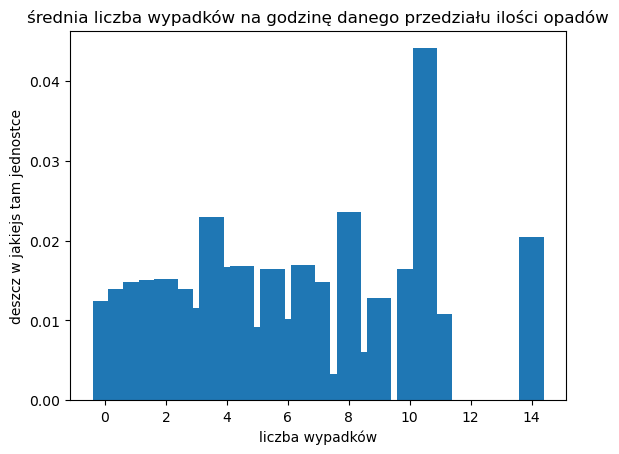

In [101]:
plt.bar(crashes_rain_count['RainClass'], crashes_rain_count['CrashCountNorm'])
plt.title('średnia liczba wypadków na godzinę danego przedziału ilości opadów')
plt.xlabel('liczba wypadków')
plt.ylabel('deszcz w jakiejs tam jednostce')

In [103]:
# wygląda lepiej niż ten w power BI :)
# im więcej danych tym powinien lepiej wyglądać
# oczywiście problem jest taki że deszczów z dużymi wartościami jest mało więc np trzeba by było np. wszystko powyżej 12mm deszczu wrzucić do jednej klasy